Camel 3 Function 
=====================


In [1]:
using Pkg
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using StaticArrays

  Activating project at `~/globtim`


We define the center and range of the square domain of approximation. 

In [2]:
# Constants and Parameters
const n, a, b = 2, 50, 1
const scale_factor = a / b
f = dejong5 # Objective function
d = 24 # Initial Degree 
SMPL = 200   
println("Number of samples: ", SMPL^2)
TR = test_input(f, 
                dim = n,
                center = [0.0, 0.0],
                GN = SMPL, 
                sample_range = scale_factor
                )

Number of samples: 40000


test_input(2, [0.0, 0.0], 200, (0.1, 0.5), 0.002, (0.0, 0.0), 50.0, 1.0, 6, Globtim.dejong5)

The `Constructor` function computes the coefficients of the polynomial approximant in the basis specified, with `GN^2` samples distributed following the measure with respect to which the polynomial basis is orthogonal.
The `RationalPrecision` specifies that the conversion of the polynomial's coefficients from the tensorized orthogonal basis to the standard monomial basis is carried out in high precision. 

In [3]:
pol_cheb = Constructor(TR, d, basis=:chebyshev, precision=RationalPrecision)
pol_lege = Constructor(TR, d, basis=:legendre, precision=RationalPrecision, normalized=true);

current L2-norm: 144.54224545919263
current L2-norm: 143.89619204756383


Note that with the `Legendre` polynomials, it is necessary to run with the `normalized` option to ensure that the polynomials are orthonormal with respect to the uniform measure on the domain of approximation.

In [4]:
@polyvar(x[1:n]) # Define polynomial ring 
real_pts_cheb = solve_polynomial_system(
    x, n, d, pol_cheb.coeffs;
    basis=pol_cheb.basis,
    precision=pol_cheb.precision,
    normalized=pol_cheb.normalized,
)

real_pts_lege = solve_polynomial_system(
    x, n, d, pol_lege.coeffs;
    basis=pol_lege.basis,
    precision=pol_lege.precision,
    normalized=pol_lege.normalized)

df_cheb = process_crit_pts(real_pts_cheb, f, TR)
df_lege = process_crit_pts(real_pts_lege, f, TR);

Tracking 529 paths...   0%|▏                            |  ETA: 0:19:22



Tracking 529 paths... 100%|█████████████████████████████| Time: 0:00:04
                   # paths tracked: 529
   # non-singular solutions (real): 529 (305)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 529 (305)
Tracking 529 paths...   0%|▏                            |  ETA: 0:09:16



Tracking 529 paths...  76%|██████████████████████▏      |  ETA: 0:00:01



Tracking 529 paths... 100%|█████████████████████████████| Time: 0:00:02
                   # paths tracked: 529
   # non-singular solutions (real): 529 (329)
       # singular endpoints (real): 0 (0)
          # total solutions (real): 529 (329)


In [5]:
using Optim
df_cheb, df_min_cheb = analyze_critical_points(f, df_cheb, TR, tol_dist=.5);
df_lege, df_min_lege = analyze_critical_points(f, df_lege, TR, tol_dist=.5);

Processing point 1 of 287
Optimization has converged within bounds: ✓
Processing point 2 of 287
Optimization has converged within bounds: ✓
Processing point 3 of 287
Optimization has converged within bounds: ✓
Processing point 4 of 287
Optimization status: ✗ (did not converge)
Processing point 5 of 287
Optimization has converged within bounds: ✓
Processing point 6 of 287
Optimization has converged within bounds: ✓
Processing point 7 of 287
Optimization has converged within bounds: ✓
Processing point 8 of 287
Optimization has converged within bounds: ✓
Processing point 9 of 287
Optimization has converged within bounds: ✓
Processing point 10 of 287
Optimization has converged within bounds: ✓
Processing point 11 of 287
Optimization has converged within bounds: ✓
Processing point 12 of 287
Optimization has converged within bounds: ✓
Processing point 13 of 287
Optimization has converged within bounds: ✓
Processing point 14 of 287
Optimization has converged within bounds: ✓
Processing point 

In [6]:
using CairoMakie
CairoMakie.activate!

ERROR: LoadError: UndefVarError: `XYBased` not defined in `Makie`
Suggestion: check for spelling errors or missing imports.
Stacktrace:
 [1] getproperty(x::Module, f::Symbol)
   @ Base ./Base.jl:42
 [2] top-level scope
   @ ~/.julia/packages/Polynomials/13Ozz/ext/PolynomialsMakieExt.jl:6
 [3] include
   @ ./Base.jl:562 [inlined]
 [4] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base ./loading.jl:2881
 [5] top-level scope
   @ stdin:6
in expression starting at /Users/ghscholt/.julia/packages/Polynomials/13Ozz/ext/PolynomialsMakieExt.jl:1
in expression starting at stdin:6
┌ Error: Error during loading of extension PolynomialsMakieExt of Polynomials, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile PolynomialsMakieExt [6a4b1961-d857-5aa3-b7f6-fc7c46de29bb] to "/Us

activate! (generic function with 1 method)

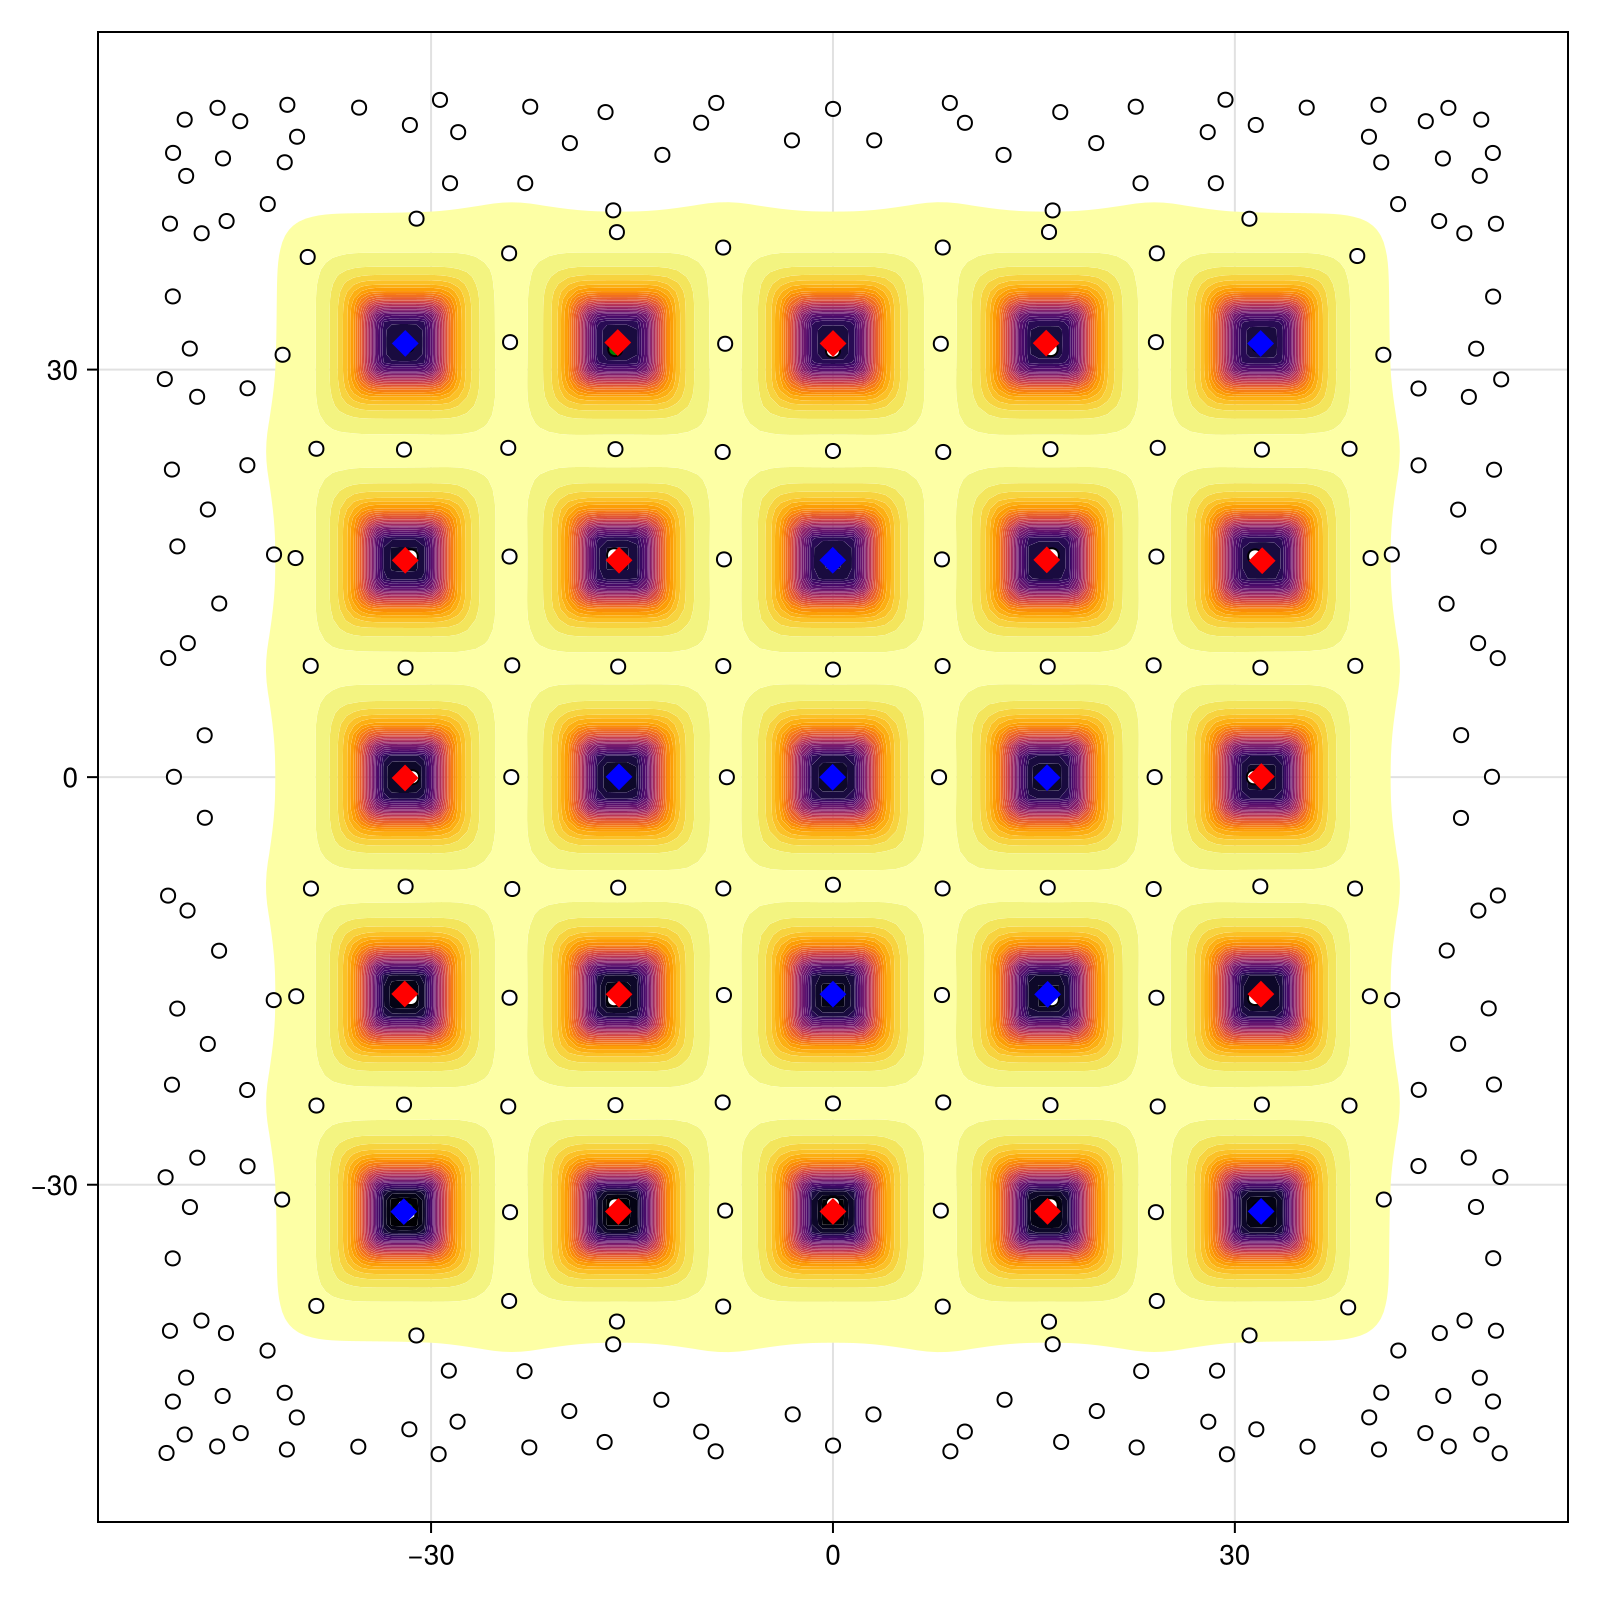

CairoMakie.Screen{IMAGE}


In [7]:
fig_1 = cairo_plot_polyapprox_levelset(pol_cheb, TR, df_cheb, df_min_cheb, chebyshev_levels=true, figure_size = (800, 800))
display(fig_1)

In [8]:
# fig_2 = cairo_plot_polyapprox_levelset(pol_lege, TR, df_lege, df_min_lege, chebyshev_levels=true, figure_size = (800, 800))
# display(fig_2)

In [9]:
using GLMakie
GLMakie.activate!

ERROR: LoadError: UndefVarError: `plot_level_set` not defined in `Globtim`
Suggestion: check for spelling errors or missing imports.
Stacktrace:
 [1] getproperty(x::Module, f::Symbol)
   @ Base ./Base.jl:42
 [2] top-level scope
   @ ~/globtim/src/LevelSetViz.jl:96
 [3] include(mod::Module, _path::String)
   @ Base ./Base.jl:562
 [4] include(x::String)
   @ GlobtimGLMakieExt ~/globtim/ext/GlobtimGLMakieExt.jl:1
 [5] top-level scope
   @ ~/globtim/ext/GlobtimGLMakieExt.jl:11
 [6] include
   @ ./Base.jl:562 [inlined]
 [7] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base ./loading.jl:2881
 [8] top-level scope
   @ stdin:6
in expression starting at /Users/ghscholt/globtim/src/LevelSetViz.jl:96
in expression starting at /Users/ghscholt/globtim/ext/GlobtimGLMakieExt.jl:1
in expression starting at stdin:6
┌ Error: Error durin

activate! (generic function with 1 method)

In [12]:
fig_3d = plot_polyapprox_3d(
    pol_lege, 
    TR, 
    df_lege, 
    df_min_lege, 
    figure_size=(1600, 1600),
    fade=true,
    z_cut=0.001
)
display(fig_3d)

MethodError: MethodError: no method matching plot_polyapprox_3d(::ApproxPoly{Float64, Float64}, ::test_input, ::DataFrame, ::DataFrame; figure_size::Tuple{Int64, Int64}, fade::Bool, z_cut::Float64)
The function `plot_polyapprox_3d` exists, but no method is defined for this combination of argument types.

In [11]:
# save("DeJong_lege_3d.png", fig_3d)